In [1]:
!pip install ipywidgets

In [2]:
## Import necessary packages
import os
from urllib.request import urlretrieve 
import zipfile
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests
import pandas as pd

In [3]:
data1 = pd.read_csv('../data/data_p2.csv')

In [4]:
data1

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,30.0,100.0,8.0,0.5181,18.9080,1.1045,0.00010,0.0,0.6,...,0.0,4.083,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0
113933,229.8,65.0,100.0,80.0,0.0000,6.2794,38.6100,0.98834,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44733.0,45245.0


# PROBLEM 2

In [5]:
data1_offline = data1.loc[(data1['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].notnull()) & (data1['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].notnull()) & (data1['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].notnull())]
data1_offline

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag
4,1.0,30.0,100.0,8.0,0.5181,18.9080,1.1045,0.0001,0.0,0.6,...,0.0,4.083,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
59,12.0,42.0,100.0,15.0,0.0000,61.5350,168.1500,0.0001,0.0,0.6,...,0.0,10.792,0.0,0.0,1.0,1.0,1.0,0.0,21523.0,21661.0
119,24.0,55.0,100.0,150.0,0.0000,225.0000,226.6800,0.0001,0.0,0.7,...,0.0,21.978,0.0,0.0,1.0,1.0,1.0,0.0,20677.0,20314.0
179,36.0,55.0,100.0,43.0,0.0000,40.6350,147.1400,0.0001,0.0,0.9,...,0.0,35.283,0.0,0.0,1.0,1.0,1.0,0.0,26823.0,26638.0
239,48.0,60.0,100.0,57.0,0.0000,39.7660,139.2000,0.0001,0.0,1.1,...,0.0,49.221,0.0,0.0,1.0,1.0,1.0,0.0,37854.0,37521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113744,192.0,75.0,100.0,80.0,3.6321,0.0000,49.6750,1.1732,150.0,0.9,...,0.0,110.280,0.0,0.0,1.0,100.0,100.0,1.0,52269.0,52130.0
113804,204.0,65.0,100.0,80.0,0.0000,14.1390,102.2900,13.1700,250.0,0.9,...,0.0,115.890,0.0,0.0,1.0,100.0,100.0,1.0,50543.0,50565.0
113864,216.0,65.0,100.0,80.0,0.0000,8.7419,8.2876,58.4390,250.0,0.9,...,0.0,116.940,0.0,0.0,1.0,100.0,100.0,1.0,46727.0,46912.0
113924,228.0,65.0,100.0,80.0,0.0000,6.1901,93.3950,11.9940,250.0,0.9,...,0.0,117.800,0.0,0.0,1.0,100.0,100.0,1.0,44101.0,43948.0


In [6]:
data1_online = data1.loc[(data1['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].isnull()) | (data1['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].isnull()) | (data1['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].isnull())]
data1_online

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
5,1.2,30.0,100.0,8.0,1.0387,9.4541,0.0001,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113929,229.0,65.0,100.0,80.0,0.0000,14.6420,9.7624,59.35900,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44895.0,45241.0
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0


In [7]:

for col in data1_online.columns:
    print(col)


Time (h)
Aeration rate(Fg:L/h)
Agitator RPM(RPM:RPM)
Sugar feed rate(Fs:L/h)
Acid flow rate(Fa:L/h)
Base flow rate(Fb:L/h)
Heating/cooling water flow rate(Fc:L/h)
Heating water flow rate(Fh:L/h)
Water for injection/dilution(Fw:L/h)
Air head pressure(pressure:bar)
Dumped broth flow(Fremoved:L/h)
Substrate concentration(S:g/L)
Dissolved oxygen concentration(DO2:mg/L)
Penicillin concentration(P:g/L)
Vessel Volume(V:L)
Vessel Weight(Wt:Kg)
pH(pH:pH)
Temperature(T:K)
Generated heat(Q:kJ)
carbon dioxide percent in off-gas(CO2outgas:%)
PAA flow(Fpaa:PAA flow (L/h))
PAA concentration offline(PAA_offline:PAA (g L^{-1}))
Oil flow(Foil:L/hr)
NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))
Oxygen Uptake Rate(OUR:(g min^{-1}))
Oxygen in percent in off-gas(O2:O2  (%))
Offline Penicillin concentration(P_offline:P(g L^{-1}))
Offline Biomass concentratio(X_offline:X(g L^{-1}))
Carbon evolution rate(CER:g/h)
Ammonia shots(NH3_shots:kgs)
Viscosity(Viscosity_offline:centPoise)
Fault reference(Faul

In [8]:
y_on_1 = data1_online['Penicillin concentration(P:g/L)']
y_on_2 = data1_online['Substrate concentration(S:g/L)']
# y_on_3 = data1_online['Penicillin concentration(P:g/L)']

In [9]:
y_on = y_on_1

In [10]:

X_on = data1_online.drop(['Penicillin concentration(P:g/L)'],axis = 1)
y_on,X_on

(0         1.017800e-25
 1         1.000000e-03
 2         9.993400e-04
 3         9.987400e-04
 5         9.977100e-04
               ...     
 113929    5.664400e+00
 113930    5.656700e+00
 113931    5.649000e+00
 113932    5.641400e+00
 113933    5.633900e+00
 Name: Penicillin concentration(P:g/L), Length: 111873, dtype: float64,
         Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
 0            0.2                   30.0                  100.0   
 1            0.4                   30.0                  100.0   
 2            0.6                   30.0                  100.0   
 3            0.8                   30.0                  100.0   
 5            1.2                   30.0                  100.0   
 ...          ...                    ...                    ...   
 113929     229.0                   65.0                  100.0   
 113930     229.2                   65.0                  100.0   
 113931     229.4                   65.0                  100

In [11]:
!pip install seaborn

In [12]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [13]:
X_on['Sugar mass flow'] = X_on['Sugar feed rate(Fs:L/h)']*X_on['Substrate concentration(S:g/L)']

In [14]:
Col1=['Sugar mass flow','Water for injection/dilution(Fw:L/h)','Dissolved oxygen concentration(DO2:mg/L)','Vessel Volume(V:L)','pH(pH:pH)','Temperature(T:K)'] 

In [15]:
X_on = X_on[Col1]

In [16]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,X_test,y_train,y_test=train_test_split(X_on,y_on,test_size=0.2,random_state=1234)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (89498, 6)
X_test Shape : (22375, 6)
y_train Shape : (89498,)
y_test Shape : (22375,)


In [17]:
import joblib

scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

joblib.dump(scaled, '../model/scale.h5')


['../model/scale.h5']

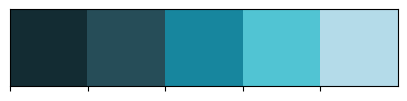

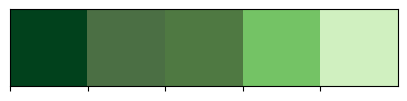

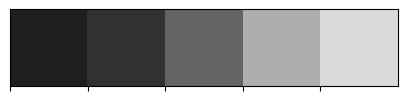

In [18]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)
cm = sns.light_palette('green', as_cmap=True)

In [19]:
def model_default(model,model_name,X = X_test,y_real= y_test,offline = False):
    global X_train
    global y_train
    if offline is False:
        model.fit(X_train, y_train)
    y_head=model.predict(X)
    print('-'*10+model_name+'-'*10)
    print('R square Accuracy: ',r2_score(y_real,y_head))
    print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_real,y_head))
    print('Mean Squared Error Accuracy: ',mean_squared_error(y_real,y_head)) 
    return y_head   
    
  
def plot_prediction(model, model_name):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    df2 = pd.concat([pd.concat([pd.DataFrame(y_test.values, columns=['real']), pd.DataFrame(y_pred_test, columns=['predict']),pd.DataFrame(['Test data']*y_test.size, columns=['kind'])], axis=1),
                 pd.concat([pd.DataFrame(y_train, columns=['real']), pd.DataFrame(y_pred_train, columns=['predict']),pd.DataFrame(['Train data']*y_train.size, columns=['kind'])], axis=1)],axis=0,ignore_index=True)

    plot = sns.jointplot('predict','real',data=df2,hue='kind')
    plot.ax_joint.plot([0,40], [0,40], 'r-', linewidth = 2)
    plot.fig.suptitle(model_name)
    

def cross_val(model):
    kfold = KFold(n_splits=10, shuffle=True)
    scoring = ['neg_mean_absolute_error','neg_mean_squared_error','r2']
    kf_cv_scores = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    print("R2 Score average score: %.5f, std: %.5f" % (kf_cv_scores['test_r2'].mean(), kf_cv_scores['test_r2'].std()) )
    print("MAE average score: %.5f, std: %.5f" % (-kf_cv_scores['test_neg_mean_absolute_error'].mean(),kf_cv_scores['test_neg_mean_absolute_error'].std()))
    print("MSE average score: %.5f, std: %.5f" % (-kf_cv_scores['test_neg_mean_squared_error'].mean(), kf_cv_scores['test_neg_mean_squared_error'].std()))


In [20]:
xgb_reg = xgb.XGBRegressor()
y_head = model_default(xgb_reg,'XGB online set')

----------XGB online set----------
R square Accuracy:  0.979528354485128
Mean Absolute Error Accuracy:  0.9661805168782995
Mean Squared Error Accuracy:  2.032745002764474


In [21]:
data1["Cust"] = pd.cut(data1["2-PAT control(PAT_ref:PAT ref)"], bins= [0, 30, 60, 100]
        , labels= ["cust1", "cust2", "cust3"])

In [22]:
data1["Project_ID"] = pd.cut(data1["2-PAT control(PAT_ref:PAT ref)"], bins= [0, 10, 20,30,40,50,60,70,80,90,100,]
        , labels= ["B001", "B002", "B003","B001", "B002", "B003","B001", "B002", "B003","B004"],ordered=False)

In [23]:
data1

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,Cust,Project_ID
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,cust1,B001
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,cust1,B001
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,cust1,B001
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,cust1,B001
4,1.0,30.0,100.0,8.0,0.5181,18.9080,1.1045,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,cust1,B001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0,cust3,B004
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0,cust3,B004
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0,cust3,B004
113933,229.8,65.0,100.0,80.0,0.0000,6.2794,38.6100,0.98834,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,44733.0,45245.0,cust3,B004


In [24]:
data1['2-PAT control(PAT_ref:PAT ref)'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [25]:
data1['2-PAT control(PAT_ref:PAT ref)'].value_counts()

29.0    1450
3.0     1390
23.0    1320
45.0    1310
25.0    1305
        ... 
75.0     960
17.0     940
15.0     905
5.0      895
67.0     835
Name: 2-PAT control(PAT_ref:PAT ref), Length: 100, dtype: int64

In [26]:
cross_val(xgb_reg)

R2 Score average score: 0.97896, std: 0.00039
MAE average score: 0.97318, std: 0.00675
MSE average score: 2.06854, std: 0.03895


In [27]:
plot_prediction(xgb_reg,"XGB online set")

TypeError: jointplot() got multiple values for argument 'data'

Offline

In [ ]:
y_off_1 = data1_offline['Offline Penicillin concentration(P_offline:P(g L^{-1}))']
y_off_2 = data1_offline['Offline Biomass concentratio(X_offline:X(g L^{-1}))']


In [ ]:
y_off = y_off_1
X_off = data1_offline.drop(['Penicillin concentration(P:g/L)',],axis = 1)
y_off,X_off

(4         1.017800e-25
 59        9.695600e-04
 119       9.166800e-04
 179       1.213400e+00
 239       3.299000e+00
               ...     
 113744    7.266900e+00
 113804    6.768100e+00
 113864    6.232600e+00
 113924    5.734100e+00
 113934    5.656700e+00
 Name: Offline Penicillin concentration(P_offline:P(g L^{-1})), Length: 2062, dtype: float64,
         Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
 4            1.0                   30.0                  100.0   
 59          12.0                   42.0                  100.0   
 119         24.0                   55.0                  100.0   
 179         36.0                   55.0                  100.0   
 239         48.0                   60.0                  100.0   
 ...          ...                    ...                    ...   
 113744     192.0                   75.0                  100.0   
 113804     204.0                   65.0                  100.0   
 113864     216.0                   65.

In [ ]:
X_off['Sugar mass flow'] = X_off['Sugar feed rate(Fs:L/h)']*X_off['Substrate concentration(S:g/L)']

In [ ]:
X_off = X_off[Col1]

In [ ]:
X_off = scaled.transform(X_off)

In [ ]:
y_head = model_default(xgb_reg,'XBG offline set',X = X_off,y_real = y_off,offline=True)

----------XBG offline set----------
R square Accuracy:  0.9784370916968651
Mean Absolute Error Accuracy:  1.0157840135342628
Mean Squared Error Accuracy:  2.269175423914108


In [29]:
xgb_reg.save_model( '../model/operation_v1.h5')

#### ADA BOOST

In [ ]:
X_train

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
y_head = model_default(adb,'ADB online set')

In [ ]:
cross_val(adb)

In [ ]:
plot_prediction(adb,"ADABOOST")

In [ ]:
y_head = model_default(adb,'A',X = X_off,y_real=y_off,offline=True)

In [ ]:
import seaborn as sns
plot = sns.jointplot(y_head,y_off)
plot.ax_joint.plot([0,40], [0,40], 'r-', linewidth = 2)
plot.set_axis_labels("predict values","real values")

#### ANN - Pen

In [ ]:
# Using gridsearchCV to hyperparameter tunning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

2023-08-29 12:10:27.079964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 12:10:27.376580: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-29 12:10:27.376605: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-29 12:10:28.534908: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [ ]:
X_on.shape

In [ ]:
def make_regression_ann(hidden_unit1 = 12,hidden_unit2 = 24,initializer='normal', activation='relu', optimizer='adam', loss='mse'):

    model = Sequential()
    model.add(Dense(units=hidden_unit1, input_dim=X_on.shape[1], kernel_initializer=initializer, activation=activation))
    model.add(Dense(units=hidden_unit2, kernel_initializer=initializer, activation=activation))
    model.add(Dense(1, kernel_initializer=initializer))
    model.compile(loss=loss, optimizer=optimizer)

    return model

param_grid = {
    #hidden layer equal 2 => no tunning
    'hidden_unit1':[24],# run for 96 node and 192 node
    'hidden_unit2':[24],#run for 96 node and 192 node
    'epochs':[20]
}
# total 2^7
grid_search = GridSearchCV(
    estimator=KerasRegressor(make_regression_ann, verbose=0),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',#valuation with neg_mean_squared_error
    cv=3,
)





/tmp/ipykernel_18047/2988035880.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator=KerasRegressor(make_regression_ann, verbose=0),


In [ ]:
X, y = make_regression(n_features=X_on.shape[1], n_samples=1, random_state=42)

In [ ]:
y

In [ ]:
grid_search.fit(X_train, y_train, verbose=1)

2023-08-29 12:10:47.028346: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-29 12:10:47.028527: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-29 12:10:47.028563: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nguyen-computer): /proc/driver/nvidia/version does not exist
2023-08-29 12:10:47.029160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
1865/1865 [==============================] - 3s 1ms/step - loss: 50.7599
Epoch 2/20
1865/1865 [==============================] - 2s 1ms/step - loss: 12.2069
Epoch 3/20
1865/1865 [==============================] - 2s 1ms/step - loss: 7.2603
Epoch 4/20
1865/1865 [==============================] - 2s 1ms/step - loss: 6.2487
Epoch 5/20
1865/1865 [==============================] - 2s 1ms/step - loss: 5.7731
Epoch 6/20
1865/1865 [==============================] - 2s 1ms/step - loss: 5.3562
Epoch 7/20
1865/1865 [==============================] - 2s 1ms/step - loss: 5.1322
Epoch 8/20
1865/1865 [==============================] - 2s 1ms/step - loss: 4.9861
Epoch 9/20
1865/1865 [==============================] - 2s 1ms/step - loss: 4.8914
Epoch 10/20
1865/1865 [==============================] - 2s 1ms/step - loss: 4.8332
Epoch 11/20
1865/1865 [==============================] - 2s 1ms/step - loss: 4.7972
Epoch 12/20
1865/1865 [==============================] - 2s 1ms/step - loss: 4.7614

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe7ab058730>,
             param_grid={'epochs': [20], 'hidden_unit1': [24],
                         'hidden_unit2': [24]},
             scoring='neg_mean_squared_error')

In [ ]:
model_default(grid_search,"ANN")

----------ANN----------
R square Accuracy:  0.9547666098641452
Mean Absolute Error Accuracy:  1.4862630045761234
Mean Squared Error Accuracy:  4.491478112492584


array([ 0.04609011,  2.206006  , 10.996264  , ...,  8.399471  ,
       31.344671  ,  0.08398722], dtype=float32)

In [ ]:
grid_search.predict(X_train)

In [ ]:
from keras.models import load_model
grid_search.save("model_process.h5")

In [ ]:
model = Sequential()
model.add(Dense(units=24, input_dim=X_on.shape[1], kernel_initializer="normal", activation="relu"))
model.add(Dense(units=24, kernel_initializer="normal", activation="relu"))
model.add(Dense(1, kernel_initializer="normal"))
model.compile(loss='mse', optimizer="adam")

In [ ]:
model.fit(X_train,y_train,epochs = 20)

In [ ]:
model_default(model,'ANN')

In [ ]:
from keras.models import load_model
model.save("network.h5")